In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [40]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


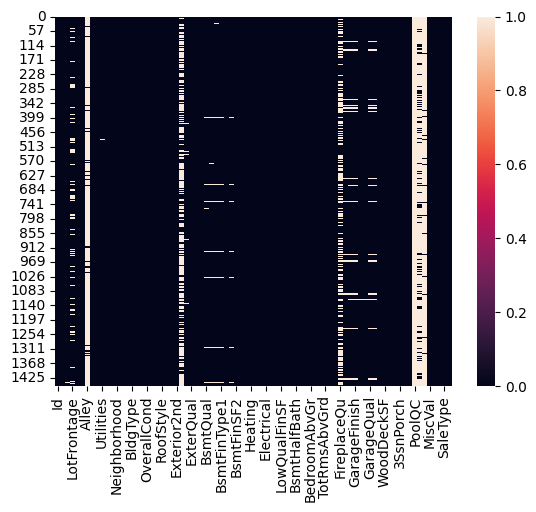

In [41]:
sns.heatmap(df_test.isnull())
plt.show()

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [43]:
for nv in df_test:
    print(nv,':',df_test[nv].isnull().sum(),df_test[nv].dtype)

Id : 0 int64
MSSubClass : 0 int64
MSZoning : 4 object
LotFrontage : 227 float64
LotArea : 0 int64
Street : 0 object
Alley : 1352 object
LotShape : 0 object
LandContour : 0 object
Utilities : 2 object
LotConfig : 0 object
LandSlope : 0 object
Neighborhood : 0 object
Condition1 : 0 object
Condition2 : 0 object
BldgType : 0 object
HouseStyle : 0 object
OverallQual : 0 int64
OverallCond : 0 int64
YearBuilt : 0 int64
YearRemodAdd : 0 int64
RoofStyle : 0 object
RoofMatl : 0 object
Exterior1st : 1 object
Exterior2nd : 1 object
MasVnrType : 894 object
MasVnrArea : 15 float64
ExterQual : 0 object
ExterCond : 0 object
Foundation : 0 object
BsmtQual : 44 object
BsmtCond : 45 object
BsmtExposure : 44 object
BsmtFinType1 : 42 object
BsmtFinSF1 : 1 float64
BsmtFinType2 : 42 object
BsmtFinSF2 : 1 float64
BsmtUnfSF : 1 float64
TotalBsmtSF : 1 float64
Heating : 0 object
HeatingQC : 0 object
CentralAir : 0 object
Electrical : 0 object
1stFlrSF : 0 int64
2ndFlrSF : 0 int64
LowQualFinSF : 0 int64
GrLivAre

In [44]:
df_test.drop(['Alley','Id','GarageYrBlt','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [45]:
float_cols = df_test.select_dtypes(float).columns
for fc in float_cols:
    df_test[fc] = df_test[fc].fillna(df_test[fc].mean())

In [46]:
obj_cols = df_test.select_dtypes(object).columns
for objc in obj_cols:
    df_test[objc] = df_test[objc].fillna(df_test[objc].mode()[0])

In [47]:

for nv in df_test:
    print(nv,':',df_test[nv].isnull().sum(),df_test[nv].dtype)

MSSubClass : 0 int64
MSZoning : 0 object
LotFrontage : 0 float64
LotArea : 0 int64
Street : 0 object
LotShape : 0 object
LandContour : 0 object
Utilities : 0 object
LotConfig : 0 object
LandSlope : 0 object
Neighborhood : 0 object
Condition1 : 0 object
Condition2 : 0 object
BldgType : 0 object
HouseStyle : 0 object
OverallQual : 0 int64
OverallCond : 0 int64
YearBuilt : 0 int64
YearRemodAdd : 0 int64
RoofStyle : 0 object
RoofMatl : 0 object
Exterior1st : 0 object
Exterior2nd : 0 object
MasVnrType : 0 object
MasVnrArea : 0 float64
ExterQual : 0 object
ExterCond : 0 object
Foundation : 0 object
BsmtQual : 0 object
BsmtCond : 0 object
BsmtExposure : 0 object
BsmtFinType1 : 0 object
BsmtFinSF1 : 0 float64
BsmtFinType2 : 0 object
BsmtFinSF2 : 0 float64
BsmtUnfSF : 0 float64
TotalBsmtSF : 0 float64
Heating : 0 object
HeatingQC : 0 object
CentralAir : 0 object
Electrical : 0 object
1stFlrSF : 0 int64
2ndFlrSF : 0 int64
LowQualFinSF : 0 int64
GrLivArea : 0 int64
BsmtFullBath : 0 float64
BsmtHa

<Axes: >

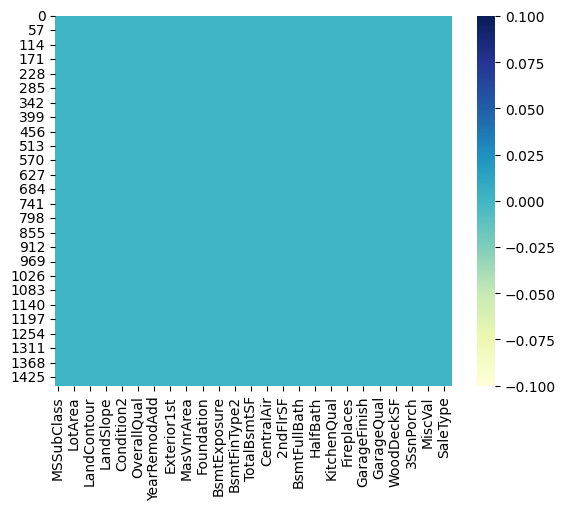

In [48]:
sns.heatmap(df_test.isnull(),cmap='YlGnBu')

In [49]:
ctg_cols = df_test.select_dtypes(object).columns

len(ctg_cols)

39

In [60]:
df_test.to_csv('Clean_test.csv')
df_test.shape

(1459, 74)